In this notebook, we will play with the models.

In [1]:
from torchvision.models import resnet18
import model_utils
import plotter
import data
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from torch.utils.data import DataLoader

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = data.CIFAKEDataset(root_dir="data/CIFAKE", split="train")
test_data = data.CIFAKEDataset(root_dir="data/CIFAKE", split="test")
type(train_data[10])

tuple

In [3]:
# import model to finetune
model = model_utils.FTModel(model=resnet18(weights='IMAGENET1K_V1'))
device = model_utils.get_device()
print(f"using {device} device")
model.model.to(device)

LEARNING_RATE = 3e-4
EPOCHS = 10
BATCH_SIZE = 128

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, pin_memory=True, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, pin_memory=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.model.fc.parameters(), lr=LEARNING_RATE)

dataloaders = (train_dataloader, test_dataloader)

using cuda device


In [4]:
# N.B.: the loss displayed is the testing loss! (not train unless specified)

losses = model_utils.train(dataloaders, loss_fn, optimizer, model.model, "FTResNet", BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=False)

Epoch 1/10
-------------------------------
training loss: 0.787494  [ 5120/100000]
training loss: 0.703738  [10240/100000]
training loss: 0.736755  [15360/100000]
training loss: 0.710391  [20480/100000]
training loss: 0.708825  [25600/100000]
training loss: 0.771173  [30720/100000]
training loss: 0.661116  [35840/100000]
training loss: 0.686812  [40960/100000]
training loss: 0.639077  [46080/100000]
training loss: 0.643570  [51200/100000]
training loss: 0.657821  [56320/100000]
training loss: 0.602883  [61440/100000]
training loss: 0.665271  [66560/100000]
training loss: 0.591375  [71680/100000]
training loss: 0.673362  [76800/100000]
training loss: 0.678904  [81920/100000]
training loss: 0.721372  [87040/100000]
training loss: 0.574846  [92160/100000]
training loss: 0.643709  [97280/100000]
Validation Error: 
 Accuracy: 67.4%, Avg loss: 0.004811 

new best model found
best model saved
Epoch 2/10
-------------------------------
training loss: 0.634138  [ 5120/100000]
training loss: 0.5

In [5]:
model_utils.test(test_dataloader, model.model, loss_fn, device)

Test Error: 
 Accuracy: 75.7%, Avg loss: 0.003974 



0.003974110315740109

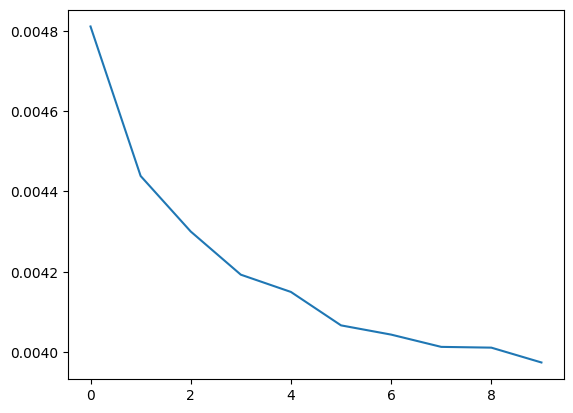

In [8]:
if losses != []: plotter.plot_losses(losses)